<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev113_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Regression Project
Data Set: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) <br>
*\"Can you cut the time a Mercedes-Benz spends on the test bench?\"*

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#import warnings
#warnings.filterwarnings("ignore")

train = pd.read_csv("/content/drive/My Drive/MertColab/proje2/train.csv")
test = pd.read_csv("/content/drive/My Drive/MertColab/proje2/test.csv")

# Let's convert the data of these columns to numeric values.
# e.g a=1, c=3, z=26, aa=27, ac=29, ba=54, bd=57 etc.
from string import ascii_lowercase

for data in (test, train):
    for col in data.columns[1:10]:
        temp = 1
        for var1 in ascii_lowercase:
            var2 = "a" + var1
            var3 = "b" + var1
            data[col] = data[col].replace(var1, temp)
            data[col] = data[col].replace(var2, temp+26)
            data[col] = data[col].replace(var3, temp+26*2)
            temp+=1
        data[col] = data[col].astype("int64")    # data types are also changed.

# Standardization of these numeric values
from sklearn.preprocessing import scale

for col in train.columns[2:10]:
    train[col] = scale(train[col])
    test[col] = scale(test[col])

# REGRESSION MODELS
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

X = train.iloc[:, 2:]
y = train.y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train = sm.add_constant(X_train, has_constant="raise")
X_test = sm.add_constant(X_test, has_constant="add")
results_model = sm.OLS(y_train, X_train)
results_ols = results_model.fit()
print("\nAdjusted R-square value of OLS Model: %.4f" %results_ols.rsquared_adj)
print("Mean Absolute Error: {:.2f}".\
      format(mean_absolute_error(y_test, results_ols.predict(X_test))), 
      end="\n")

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
lasso_CV = LassoCV(alphas=np.logspace(-1, 10, 10), cv=10).fit(X_train, y_train)
lasso_score = lasso_CV.score(X_train, y_train)
print("Adjusted R-square value of Lasso Model: %.4f" %lasso_score)
print("Mean Absolute Error: {:.2f}".\
      format(mean_absolute_error(y_test, lasso_CV.predict(X_test))), 
      end="\n")

ridge_CV = RidgeCV(alphas=np.logspace(-4, 100, 10), cv=10).fit(X_train, y_train)
ridge_score = ridge_CV.score(X_train,y_train)
print("Adjusted R-square value of Ridge Model: %.4f" %ridge_score)
print("Mean Absolute Error: {:.2f}".\
      format(mean_absolute_error(y_test, ridge_CV.predict(X_test))), 
      end="\n")

elasticNet_CV = ElasticNetCV(alphas=np.logspace(-6, 100, 20), l1_ratio=0.5, cv=10).fit(X_train, y_train)
elasticNet_score = elasticNet_CV.score(X_train, y_train)
print("Adjusted R-square value of ElasticNet Model: %.4f" %elasticNet_score)
print("Mean Absolute Error: {:.2f}".\
      format(mean_absolute_error(y_test, elasticNet_CV.predict(X_test))), 
      end="\n")

X_train.drop("const", inplace=True, axis=1)
X_test.drop("const", inplace=True, axis=1)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Adjusted R-square value of OLS Model: 0.5575
Mean Absolute Error: 2251613354.11
Adjusted R-square value of Lasso Model: 0.5386
Mean Absolute Error: 5.53
Adjusted R-square value of Ridge Model: 0.5915
Mean Absolute Error: 5.80
Adjusted R-square value of ElasticNet Model: 0.5913
Mean Absolute Error: 5.77


***
# Ödev 11.3 - Keras & TensorFlow'a Giriş (Project 2)

In [4]:
from keras import models, layers

In [5]:
print("Shape of data set:\nX_train:", X_train.shape, 
      "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, 
      "\ny_test:", y_test.shape)

Shape of data set:
X_train: (3367, 376) 
y_train: (3367,)
X_test: (842, 376) 
y_test: (842,)


In [58]:
model2 = models.Sequential()    # Model for Project 2
model2.add(layers.Dense(units=512, 
                        activation="relu", 
                        input_shape=(X_train.shape[1], ), 
                        name="Hidden_Layer_1"))
model2.add(layers.Dense(units=512, 
                        activation="relu", 
                        name="Hidden_Layer_2"))
model2.add(layers.Dense(units=1, 
                        name="Output_Layer"))
model2.compile(optimizer="adam", 
               loss="mse", 
               metrics=["mae"])
history2 = model2.fit(X_train, y_train, 
                      epochs=100, 
                      batch_size=8, 
                      shuffle=True,
                      verbose=False)
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 512)               193024    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 512)               262656    
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 513       
Total params: 456,193
Trainable params: 456,193
Non-trainable params: 0
_________________________________________________________________


In [53]:
# cosmetic configuration
sns.set(style="whitegrid")
title_font = {"family":"sans-serif", 
              "color":"darkred", 
              "size":20, 
              "weight":"bold", 
              "alpha":0.9}
axis_font = {"family":"verdana", 
              "color":"black", 
              "size":16, 
              "weight":"bold"}

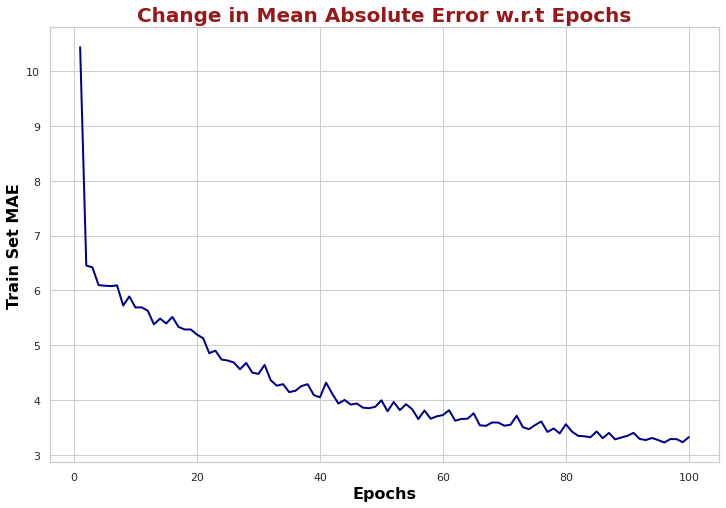

In [59]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(history2.history["mae"])+1), history2.history["mae"], 
         color="darkblue", linewidth=2)
plt.title("Change in Mean Absolute Error w.r.t Epochs", fontdict=title_font)
plt.xlabel("Epochs", fontdict=axis_font)
plt.ylabel("Train Set MAE", fontdict=axis_font)
plt.show()

In [60]:
print("Evaluating train set:")
train_evaluate = model2.evaluate(X_train, y_train, 
                                 use_multiprocessing=True, 
                                 return_dict=True)
print("Evaluating test set:")
test_evaluate = model2.evaluate(X_test, y_test, 
                                use_multiprocessing=1, 
                                return_dict=1)

Evaluating train set:
106/106 [==============================] - 0s 2ms/step - loss: 21.6827 - mae: 3.0000
Evaluating test set:
27/27 [==============================] - 0s 1ms/step - loss: 100.5269 - mae: 6.9917


---
***
---

# Project 3: Classification Project
Data Set: [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) <br>
*\"Analyze how travelers in February 2015 expressed their feelings on Twitter\"*

In [140]:
%matplotlib inline

# calling our honor guest:
tweets = pd.read_csv("/content/drive/My Drive/MertColab/proje3/tweets.csv")

# ...and she takes off her fancy fur coat and some other unnecessary ornaments 
tweets.drop(columns=["tweet_id", "airline_sentiment_gold", "name", 
                     "negativereason_gold", "retweet_count", "tweet_created", 
                     "tweet_coord", "tweet_created", "tweet_location", 
                     "user_timezone"], 
            inplace=True)

# We are going to clean the tweets to keep only the English words
import re, string, nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

# The twitter accounts mentioned:
set_them = set()
for i in tweets.text:
    search_them = re.search(r"(^|[^@\w])@(\w{1,15})\b", i)
    give_them = search_them.group().lower()
    set_them.add(give_them)
del set_them

# These are the Twitter accounts we will remove:
# @virginamerica, @united, @southwestair, @deltaassist, @usairways, @americanair

def tweet_cleaner(tweet):
    "Symbols, numbers & airline brand cleaner function!"
    # First step: Symbols and numbers are gone:
    cleaned_string = re.sub("[^a-zA-Z]", " ", tweet)

    # Party people here speak only English. No other languages are allowed:
    cleaned_string = " ".join(w for w in nltk.wordpunct_tokenize(cleaned_string) \
         if w.lower() in words)

    # Second step: Putting them to a list:
    cleaned_set = set(cleaned_string.lower().split())
    # Let's get rid of our meaningless one-letter friends: 
    what_to_clean = list(string.ascii_lowercase)
    # ...and some of their drunk buddies:
    what_to_clean.extend(["it", "of", "co", "to", "http"])
    # We don't need any officials in our party as well:
    what_to_clean.extend(["virginamerica", "united", 
                       "southwestair", "deltaassist",
                       "usairways", "americanair"])
    for delete in what_to_clean:
        try:
            cleaned_set.remove(delete)
        except:
            continue    
    return list(cleaned_set)

# We need to convert the "airline_sentiment" to numbers.
for i,j in enumerate(tweets.airline_sentiment.unique()):
    tweets.airline_sentiment = tweets.airline_sentiment.replace(j, i)
tweets.airline_sentiment.astype("int64")

# We are going to collect all the words and give them binary inputs (1 or 0)
# according to their entities in the tweets.
all_words = set()
rows=[]
for i in tweets.index:
    listed_tweet = tweet_cleaner(tweets.text[i])
    rows.append(listed_tweet)
    all_words.update(listed_tweet)

# filling the data frame with binary values according to the words
df_words = pd.DataFrame(0, columns=all_words, index=tweets.index)
for i in tweets.index:
    df_words.loc[i, rows[i]]=1

# it's time to concatenate the data frames
tweets = pd.concat([tweets, df_words], ignore_index=False, axis="columns")

# Linear Regression Models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X = tweets.iloc[:, 6:]
y = tweets.airline_sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model1 = LogisticRegression(C=0.1, solver="lbfgs", max_iter=300, n_jobs=-1)
lr_model1.fit(X_train, y_train)
train_score_model1 = lr_model1.score(X_train, y_train)
test_score_model1 = lr_model1.score(X_test, y_test)

print("\nTrain score with 'lbfgs' solver: {:.3f}".format(train_score_model1))
print("Test score with 'lbfgs' solver: {:.3f}".format(test_score_model1), "\n")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.

Train score with 'lbfgs' solver: 0.824
Test score with 'lbfgs' solver: 0.789 



***
# Ödev 11.3 - Keras & TensorFlow'a Giriş (Project 3)